<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
#file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv('survey-data.csv')

# Display the first few rows to understand the structure of the dataset
df.head()

,Unnamed: 0.1,Unnamed: 0,ResponseId,MainBranch,Age,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,...,PlatformHaveWorkedWith_OpenShift,PlatformHaveWorkedWith_Databricks,PlatformHaveWorkedWith_PythonAnywhere,PlatformHaveWorkedWith_Vultr,PlatformHaveWorkedWith_OpenStack,PlatformHaveWorkedWith_AlibabaCloud,PlatformHaveWorkedWith_IBMCloudOrWatson,PlatformHaveWorkedWith_Scaleway,PlatformHaveWorkedWith_Colocation,ExperienceRange
0,0,0,1,developer by profession,under 18,remote,Primary School,0.0,0.0,no answer,...,0,0,0,0,0,0,0,0,0,0-5
1,1,1,2,developer by profession,35-44,remote,Bachelor’s degree,20.0,17.0,"Developer, full-stack",...,0,0,0,0,0,0,0,0,0,10-20
2,2,2,3,developer by profession,45-54,remote,Master’s degree,37.0,27.0,Developer Experience,...,0,0,0,0,0,0,0,0,0,>20
3,3,3,4,learning to code,18-24,non answer,College without a degree,4.0,0.0,"Developer, full-stack",...,0,0,0,0,0,0,0,0,0,0-5
4,4,4,5,developer by profession,18-24,non answer,Secondary school,9.0,0.0,"Developer, full-stack",...,0,0,0,0,0,0,0,0,0,0-5


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


In [3]:
df_filtered = df[df['ConvertedCompYearly'] > 0]

In [4]:
comp_data = df_filtered['ConvertedCompYearly']

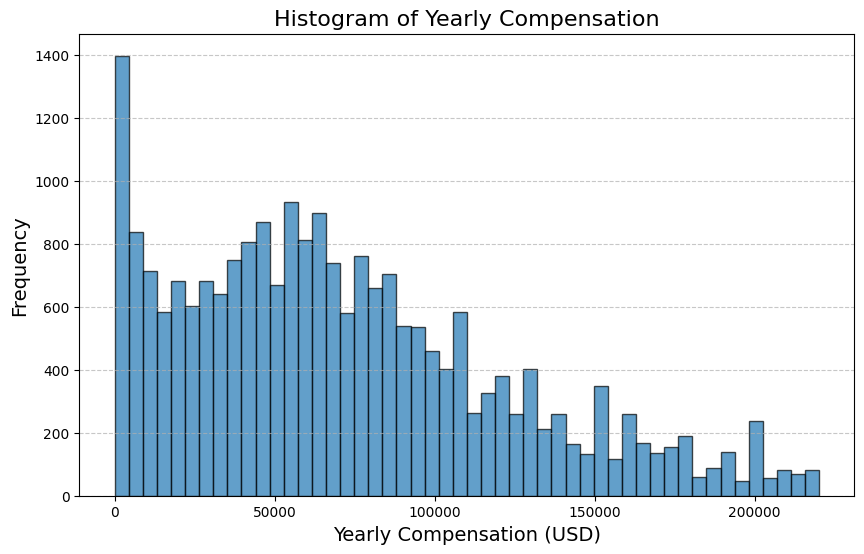

In [5]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(comp_data, bins=50, edgecolor='k', alpha=0.7)
plt.title('Histogram of Yearly Compensation', fontsize=16)
plt.xlabel('Yearly Compensation (USD)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [7]:
full_time_employed = df_filtered[df_filtered['Employment_Employedfull-time'] == 1]
median_compensation = full_time_employed['ConvertedCompYearly'].median()
print(f"Median compensation for full-time employed respondents: {median_compensation}")

Median compensation for full-time employed respondents: 64444.0


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



<Figure size 1600x800 with 0 Axes>

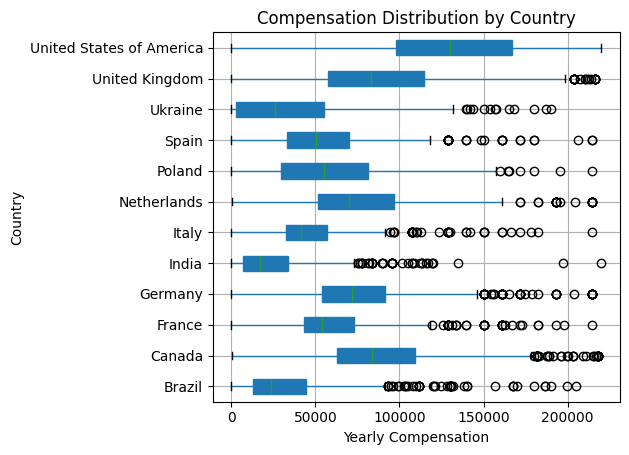

In [13]:
# Group by country and explore compensation ranges
countries_with_sufficient_data = df_filtered['Country'].value_counts()[df_filtered['Country'].value_counts() > 500].index
df_filtered = df_filtered[df_filtered['Country'].isin(countries_with_sufficient_data)]

# Create box plots for each country
plt.figure(figsize=(16, 8))
df_filtered.boxplot(column='ConvertedCompYearly', by='Country', showfliers=True, vert=False, grid=True, patch_artist=True)
plt.title('Compensation Distribution by Country')
plt.xlabel('Yearly Compensation')
plt.ylabel('Country')
plt.suptitle('')  # Suppress default title from boxplot
plt.tight_layout()
plt.show()

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


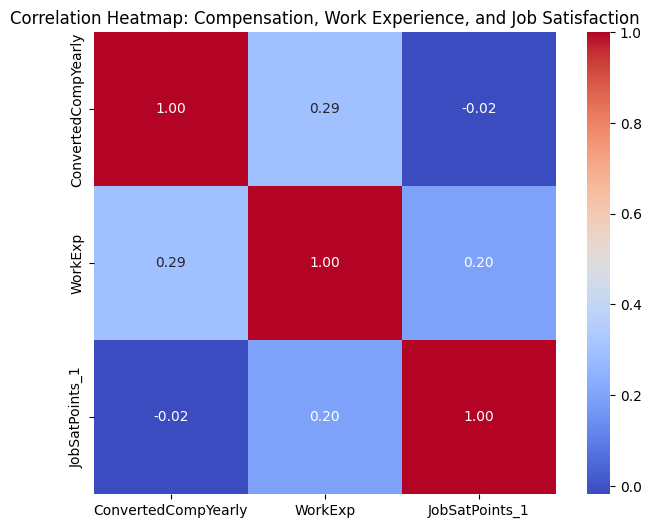

In [18]:
selected_columns = ['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']
df_selected = df_filtered[selected_columns]

# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Visualize the correlations using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Correlation Heatmap: Compensation, Work Experience, and Job Satisfaction')
plt.show()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


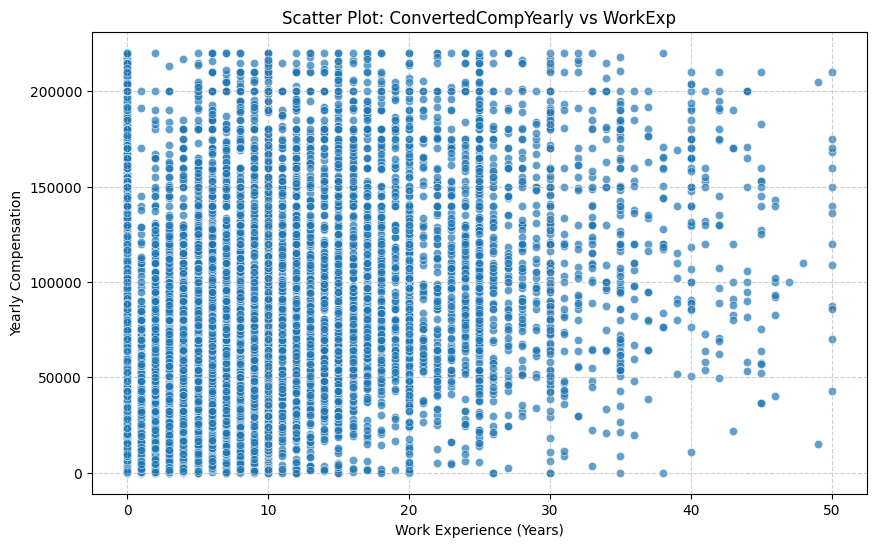

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_selected, x='WorkExp', y='ConvertedCompYearly', alpha=0.7)
plt.title('Scatter Plot: ConvertedCompYearly vs WorkExp')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Yearly Compensation')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
